<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Dimensionality Reduction SWDB 2021 </h1> 
<h3 align="center">Tuesday, August 30, 2021</h3> 

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.decomposition import PCA

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>In this tutorial we look at Unsupervised Learning.  In contrast to supervised learning, unsupervised learning operates on a set of data points $\vec{x}_i$.  Instead of trying to construct a function that maps that data onto another set of given points, we seek to find a transformation that discovers structure in the data.  
</p>
<p>
A simple and important form of unsupervised learning is called Principal Components Analysis, or PCA.  Assume the data $\vec{x}_i$ exists in $N$ dimensions.  Given an integer $n < N$, PCA attemps to find a linear subspace of dimension $n$ that minimizes the variance of the data outside of that subspace.  Put another way, PCA defines a subspace of dimension $n < N$ such that, when the data is approximated by projecting onto that subspace, the reconstruction error is minimized.  
</p>
<p>
Let us denote the subspace with the orthogonal matrix ${\bf W}$, of dimensions $(n, N)$.  The data can be represented with the matrix ${\bf X}$, of dimensions $(T, N)$, where $T$ is the number of samples.  Let the coordinates of the data in the subspace be labelled ${\bf Z}$, which is of dimensions $(T, n)$.  The cost function for PCA is then
</p>
<p>
$E = \frac{1}{2}  \left | {\bf X} - {\bf Z} \cdot {\bf W} \right |^2$
</p>
<p>
Note that we have to optimize over *both* ${\bf Z}$ and ${\bf W}$, subject to the constraint that ${\bf W}$ is orthogonal.
</p>
<p>
We can equivalently define PCA by specifying the principal components as the eigenvectors of the covariance matrix with the $n$ largest eigenvalues.  Intuitively one can see that this choice will produce the smallest amount of variability away from the subspace, and thus solve the problem as we originally defined it.  This allows us to compute the PCAs very simply with diagonalization or SVD.
</p>
<p>
    There are many other unsupervised learning methods.  They are helpful when trying to either reduce the complexity of the dataset in order to facilitate another computation (such as regression or classification) or for exploratory data analysis in which one is trying to discover structure that may be obscured by noise.
 </p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
As before, we will use `sckit-learn` to perform `Principal Components Analysis`, first on some toy data, and then on some data from the Behavior recordings.  The interface will be the same for other algorithms in `scikit-learn`.
</p>
</div>

Let's start with some toy data

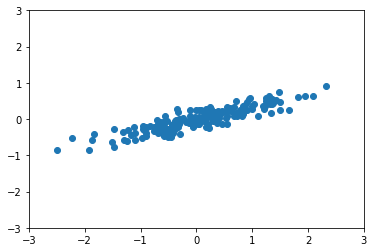

In [3]:
# generate some random 2 dimensional data
# Note that this dataset has a mean of 0 in both dimensions. This will be important later. 

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

#plot random data
plt.plot(X[:, 0], X[:, 1], 'o');
plt.ylim(-3,3);
plt.xlim(-3,3);

In [4]:
X.shape

(200, 2)

In [5]:
# Construct Covariance Matrix
A = (1.0/X.shape[0])*np.dot(X.T, X)
A

array([[0.67988975, 0.22964332],
       [0.22964332, 0.09835428]])

In [6]:
# Compute Eigenvalue decomposition of covariance matrix
evalues, evectors = np.linalg.eig(A)
evalues

array([0.75963778, 0.01860626])

In [7]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

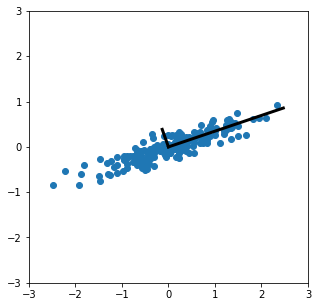

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for a,v in zip(evalues, evectors.T):
    ax.plot([0, 3.*np.sqrt(a)*v[0]], [0, 3.*np.sqrt(a)*v[1]], '-k', lw=3);

ax.set_ylim(-3,3);
ax.set_xlim(-3,3);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
PCA is an orthogonal coordinate system transformation that prioritizes maximum variance.

Project the values onto the first principal component

In [9]:
X_proj_1 = np.dot(X, evectors.T[0])

In [10]:
X_proj_1.shape

(200,)

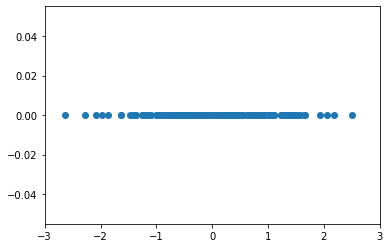

In [11]:
plt.plot(X_proj_1, np.zeros(200), 'o');
plt.xlim(-3,3);

Project the values onto the second principal component

In [12]:
X_proj_2 = np.dot(X, evectors.T[1])

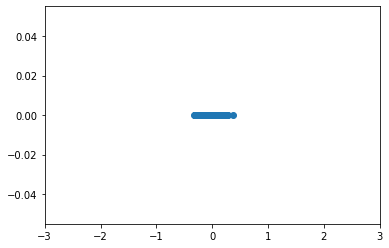

In [13]:
plt.plot(X_proj_2, np.zeros(200), 'o');
plt.xlim(-3,3);

(-2.884179690489727,
 2.757534471072491,
 -0.3547910298179801,
 0.41309286048024646)

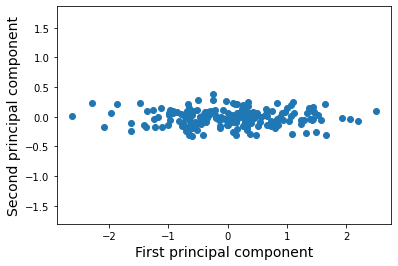

In [14]:
plt.plot(X_proj_1, X_proj_2, 'o');
plt.xlabel("First principal component", fontsize=14);
plt.ylabel("Second principal component", fontsize=14);
plt.axis('equal')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

### Now let's use sklearn.

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [17]:
pca.explained_variance_

array([0.7625315, 0.0184779])

Compare it to the variance of original dimensions

In [18]:
(1.0/X.shape[0])*np.dot(X.T, X)

array([[0.67988975, 0.22964332],
       [0.22964332, 0.09835428]])

In [19]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [20]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

These components are the same as the eigenvectors we computed above:

In [21]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

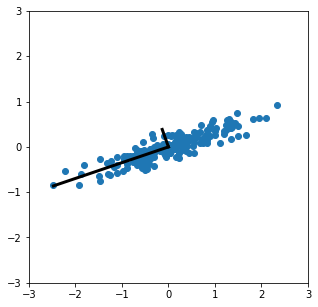

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.plot([0, v[0]], [0, v[1]], '-k', lw=3);

ax.set_ylim(-3,3);
ax.set_xlim(-3,3);

### Now let's look at the data projected onto the transforms

In [23]:
X_project = pca.transform(X)

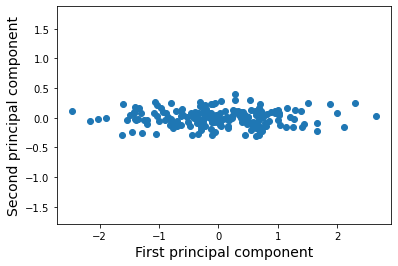

In [24]:
plt.plot(X_project[:,0], X_project[:,1], 'o');
plt.xlabel("First principal component", fontsize=14);
plt.ylabel("Second principal component", fontsize=14);
plt.axis('equal');

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

## Let's try this with some real data from the Visual Behavior dataset.

In [25]:
import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

import platform
platstring = platform.platform()

if ('amzn1' in platstring):
    # for AWS
    data_storage_directory = "/data/visual-behavior-ophys-data"
    # use local cache for AWS
    cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=data_storage_directory, use_static_cache=True)
else:  
    # for local drive, different operating systems
    if 'Darwin' in platstring:
        # OS X 
        data_root = "/Volumes/Brain2021/"
    elif 'Windows'  in platstring:
        # Windows (replace with the drive letter of USB drive)
        data_root = "E:/"
    else:
        # your own linux platform
        # EDIT location where you mounted hard drive
        data_root = "/media/$USERNAME/Brain2021/"
        data_root = "/media/koosha/Brain2021"
        
    # visual behavior cache directory
    cache_dir = manifest_path = os.path.join(data_root, "visual_behavior")
    # use from_s3_cache for loading from local directory
    cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [26]:
ophys_experiment_table = cache.get_ophys_experiment_table()
experiment_id = ophys_experiment_table.index.values[10]
ophys_experiment = cache.get_behavior_ophys_experiment(experiment_id)
dff_traces = ophys_experiment.dff_traces
tr_array = np.array(dff_traces.dff.tolist()).T
tr_array.shape

(48332, 23)

Before running PCA, we must zero-mean the data. Also the data should be in the form of (N, D) where N is the number of data points and D is dimension. 

In [27]:
print (tr_array.mean(axis = 0))
tr_array_zm = tr_array - tr_array.mean(axis = 0)

[0.06912712 0.01365334 0.28267474 0.03234453 0.02638805 0.04914064
 0.07889345 0.02585328 0.00438466 0.02067195 0.04511578 0.03933666
 0.02165939 0.00818938 0.07449294 0.02512458 0.01582338 0.41347032
 0.19972729 0.07299193 0.06538584 0.52502907 0.01866815]


In [28]:
tr_array_zm.mean(axis = 0)

array([ 7.05661908e-18, -1.83766122e-19,  1.88176509e-17,  0.00000000e+00,
        5.88051590e-19,  0.00000000e+00,  0.00000000e+00, -2.94025795e-18,
       -1.32311608e-18, -2.35220636e-18,  0.00000000e+00, -5.88051590e-19,
       -4.70441272e-18, -8.82077384e-19,  1.17610318e-18,  2.35220636e-18,
       -2.35220636e-18,  7.05661908e-18, -2.82264763e-17,  1.41132382e-17,
        3.52830954e-18,  6.82139844e-17, -1.17610318e-18])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
## How many components do we need?
Let's start getting a lot and then see which was are most informative

In [29]:
pca = PCA(n_components=20)

In [30]:
pca.fit(tr_array_zm)

PCA(n_components=20)

In [31]:
pca.components_.shape

(20, 23)

Text(0, 0.5, 'Explained variance ratio')

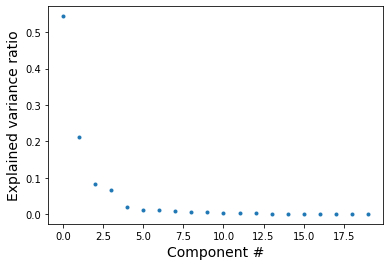

In [32]:
plt.plot(pca.explained_variance_ratio_, '.')
plt.xlabel("Component #", fontsize=14)
plt.ylabel("Explained variance ratio", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Let's visualize these data projected onto the first two components

In [33]:
tr_reduced = pca.transform(tr_array_zm)

In [34]:
tr_reduced.shape

(48332, 20)

Text(0, 0.5, 'Second principal component')

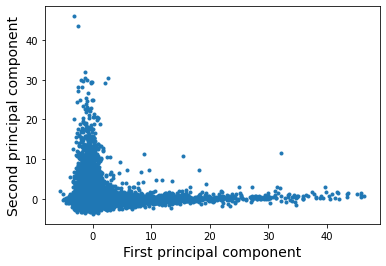

In [35]:
plt.plot(tr_reduced[:,0], tr_reduced[:,1], '.')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
### What are the two components that explain most of the variance?

Text(0.5, 0, 'Cell #')

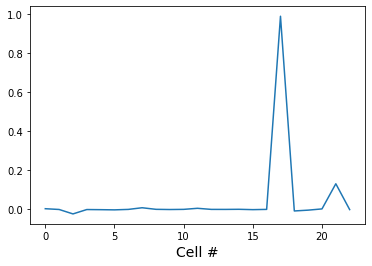

In [36]:
plt.plot(pca.components_[0])
plt.xlabel("Cell #", fontsize=14)

Text(0.5, 0, 'Cell #')

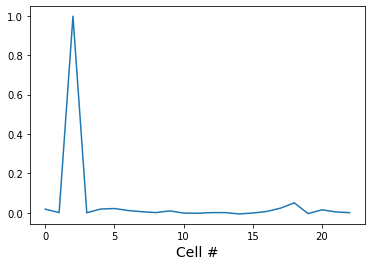

In [37]:
plt.plot(pca.components_[1])
plt.xlabel("Cell #", fontsize=14)

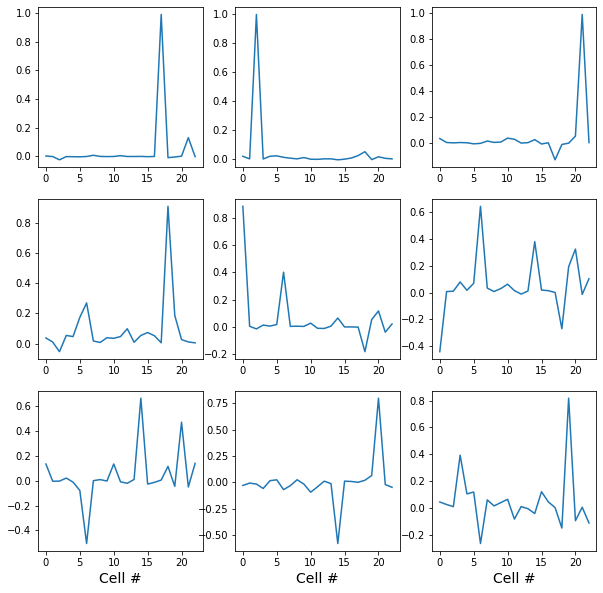

In [38]:
fig, axs = plt.subplots(3, 3, figsize = (10,10))
for i in range(9):
    axs[int(i/3), i%3].plot(pca.components_[i])
    axs[2, i%3].set_xlabel("Cell #", fontsize=14)

This suggests that there are a small number of cells that are more informative than the rest.

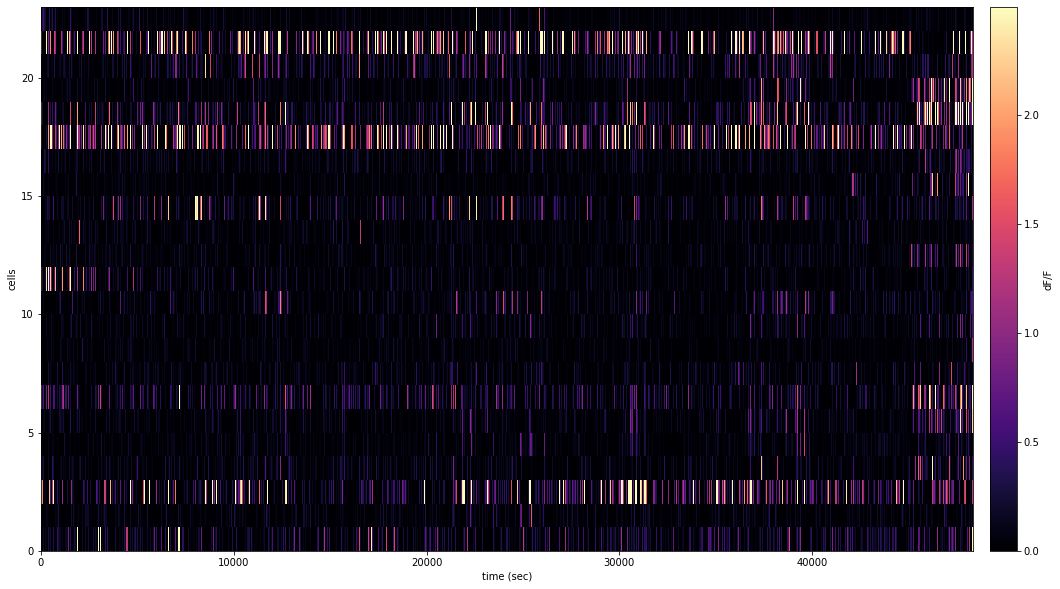

In [39]:
# plot heatmap of all cell traces in this experiment
fig, ax = plt.subplots(figsize = (20,10))

cax = ax.pcolormesh(tr_array.T,
                    vmin = 0, vmax = np.percentile(tr_array.T, 99),
                    cmap = 'magma')

# label axes 
ax.set_ylabel('cells')
ax.set_xlabel('time (sec)')

# creating a color bar
cb = plt.colorbar(cax, pad=0.015, label='dF/F')